<a href="https://colab.research.google.com/github/ggurusaran/breast_cancer_prediction-/blob/main/prediction_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [121]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
import pandas as pd
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import warnings

In [122]:
data = pd.read_csv('breast_cancer.csv')
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [123]:
data.shape

(569, 33)

In [124]:
data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [125]:
data.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [126]:
del data['Unnamed: 32']


In [127]:
del data['id']


In [128]:
x = data.drop('diagnosis', axis=1)
y = data['diagnosis']

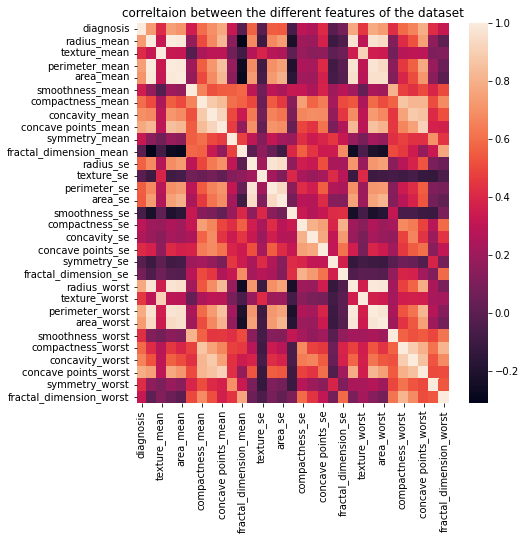

In [130]:
plt.figure(figsize=(7,7))
sns.heatmap(data.corr())
plt.title('correltaion between the different features of the dataset')
plt.show()

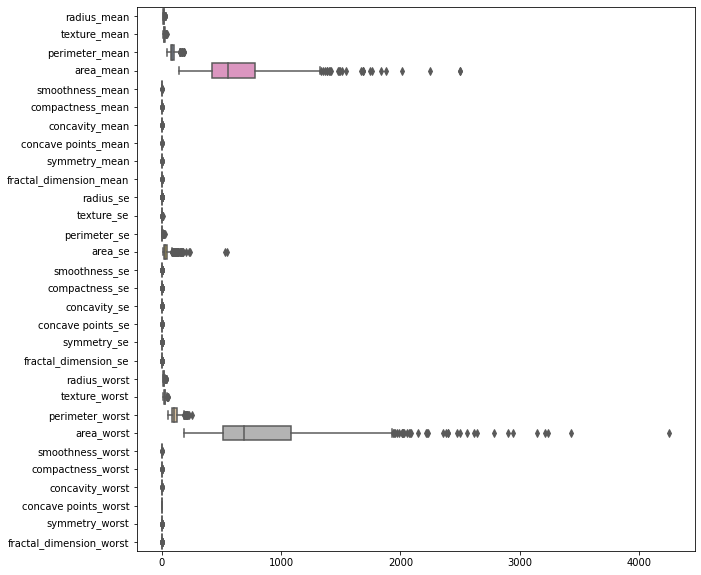

In [132]:
#to find the outliers in the dataset
plt.figure(figsize=(10,10))
sns.boxplot(data=x, orient='h', palette='Set2')
plt.show()

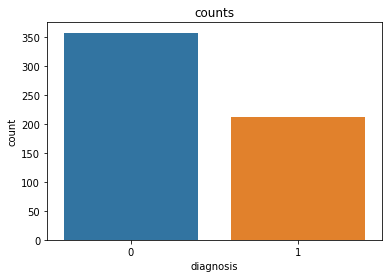

0    357
1    212
Name: diagnosis, dtype: int64


In [133]:
plt.title('counts')
sns.countplot(data=data, x= data['diagnosis'])
plt.show()
print(data.diagnosis.value_counts())

In [129]:
data['diagnosis'] = data['diagnosis'].map({'M':1,'B':0})


In [134]:
# splitting the dataset into train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

In [140]:
y

0      M
1      M
2      M
3      M
4      M
      ..
564    M
565    M
566    M
567    M
568    B
Name: diagnosis, Length: 569, dtype: object

In [141]:
data['diagnosis'] = data['diagnosis'].map({'M':1,'B':0})


In [135]:
# feature scaling 
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [136]:
classifier1 = RandomForestClassifier()
classifier1.fit(x_train,y_train)

RandomForestClassifier()

In [137]:
y_pred1 = classifier1.predict(x_test)

In [138]:
y_pred1

array(['M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B',
       'M', 'M', 'M', 'B', 'M', 'M', 'M', 'M', 'M', 'B', 'B', 'M', 'B',
       'B', 'M', 'B', 'M', 'B', 'M', 'B', 'M', 'B', 'M', 'B', 'M', 'B',
       'M', 'M', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'M', 'M',
       'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'M', 'M', 'B', 'B', 'M',
       'B', 'M', 'M', 'M', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B',
       'B', 'B', 'M', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'M', 'M', 'B',
       'M', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'M', 'B', 'M', 'B', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'B',
       'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'M'],
      dtype=object)

In [111]:
#accuracy for the randomForestClassifier model
ac = accuracy_score(y_pred1, y_test)
print('The accuracy of  RandomForestClassifer model is:')
print(ac*100 ,'%')

The accuracy of  RandomForestClassifer model is:
97.9020979020979 %


In [112]:
# we got the highest accuracy of 97.2% for RandomForestClassifier model

In [113]:
cr = classification_report(y_pred1, y_test)
print(cr)

              precision    recall  f1-score   support

           B       0.98      0.99      0.98        89
           M       0.98      0.96      0.97        54

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143



In [64]:
classifier2 = DecisionTreeClassifier()
classifier2.fit(x_train, y_train)

DecisionTreeClassifier()

In [66]:
y_pred2 = classifier2.predict(x_test)
print('The accuracy of DecisionTreeClassifier model is:')
print(accuracy_score(y_pred2, y_test))

The accuracy of DecisionTreeClassifier model is:
0.8951048951048951


In [68]:
cr1 = classification_report(y_pred2, y_test)
print(cr1)

              precision    recall  f1-score   support

           B       0.86      0.97      0.91        79
           M       0.96      0.80      0.87        64

    accuracy                           0.90       143
   macro avg       0.91      0.89      0.89       143
weighted avg       0.90      0.90      0.89       143

